In [1]:
import numpy as np
import pandas
import shap
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
from spsspro.algorithm import supervised_learning
import alepython
from alepython import ale_plot
import PyALE
from PyALE import ale
import random

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


In [2]:
#生成案例数据
data = pandas.read_csv("0416数据5%.CSV")
data_y = data.iloc[:, 0]
data_x = data.iloc[:, 1:]
#xgboost分类，输入参数详细可以光标放置函数括号内按shift+tab查看，输出结果参考spsspro模板分析报告
result = supervised_learning.xgboost_regression(data_x=data_x, data_y=data_y)

You are using an XGBoost version below 1.6.0 which is not fully supported by shap. Shap falls back to encoding the model as JSON which can lead to numerical precision issues. Please consider upgrading to XGBoost 1.6.0 or higher.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[[-0.1468665  -0.02153627 -0.0124809  ...  0.          0.
  -0.00200449]
 [-0.03272835  0.01127937  0.00563365 ...  0.          0.
  -0.00193996]
 [-0.03947357  0.00781246 -0.00203209 ...  0.          0.
  -0.00686178]
 ...
 [ 0.02430463  0.01675831  0.00619079 ...  0.          0.
   0.00158439]
 [-0.04086106  0.00864224 -0.00287251 ...  0.          0.
  -0.00648465]
 [ 0.00539065  0.00324095 -0.00220217 ...  0.          0.
  -0.0113206 ]]
.values =
array([[-0.1468665 , -0.02153627, -0.0124809 , ...,  0.        ,
         0.        , -0.00200449],
       [-0.03272835,  0.01127937,  0.00563365, ...,  0.        ,
         0.        , -0.00193996],
       [-0.03947357,  0.00781246, -0.00203209, ...,  0.        ,
         0.        , -0.00686178],
       ...,
       [ 0.02430463,  0.01675831,  0.00619079, ...,  0.        ,
         0.        ,  0.00158439],
       [-0.04086106,  0.00864224, -0.00287251, ...,  0.        ,
         0.        , -0.00648465],
       [ 0.00539065,  0.00324095, 

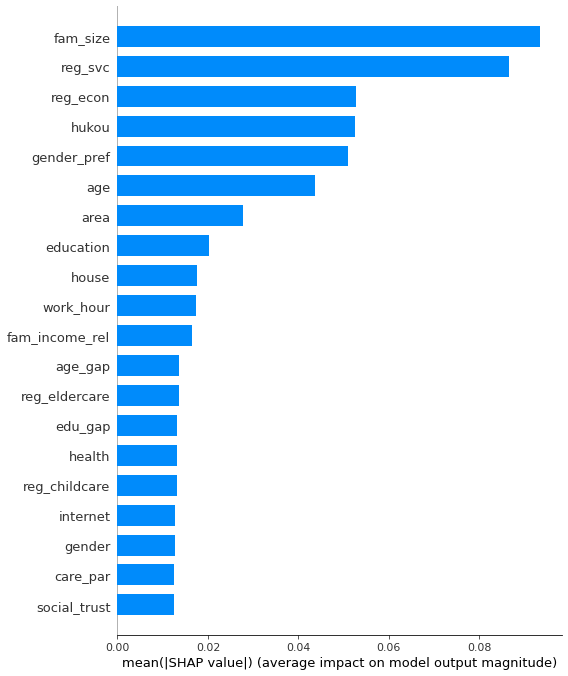

           feature  importance
0              age    0.043648
1           gender    0.012673
2            urban    0.006386
3            party    0.006096
4         fam_size    0.093530
5            hukou    0.052445
6            ethno    0.005677
7        education    0.020222
8          age_gap    0.013676
9          edu_gap    0.013260
10     gender_pref    0.050975
11     mar_satisfy    0.009058
12            work    0.005896
13       work_hour    0.017335
14       insurance    0.011988
15   care_from_par    0.005408
16    fin_from_par    0.002752
17         fin_par    0.005567
18        care_par    0.012435
19        internet    0.012692
20    social_trust    0.012414
21   social_status    0.008911
22      fixed_mind    0.012088
23     growth_mind    0.005989
24        religion    0.002794
25     gover_evalu    0.007513
26   reg_eldercare    0.013602
27   reg_childcare    0.013138
28          health    0.013249
29    reg_medicare    0.007590
30           house    0.017542
31  fam_

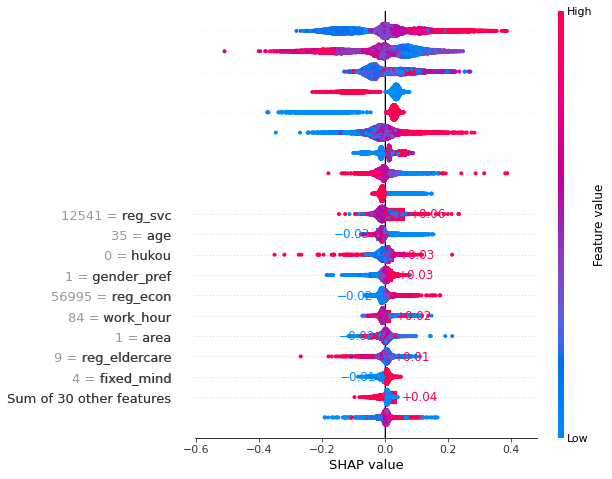

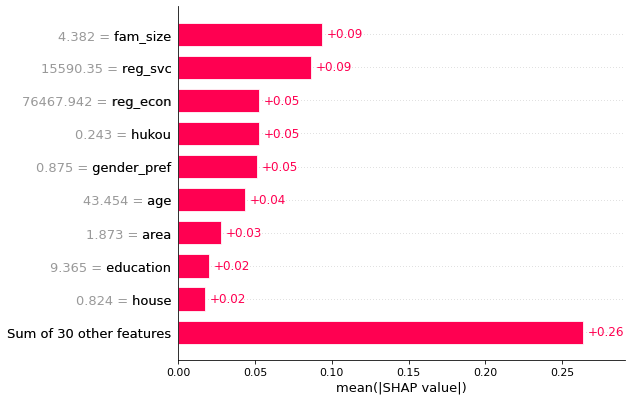

In [3]:
# SHAP分析
explainer = shap.TreeExplainer(result['model'])
shap_values = explainer.shap_values(data_x)
shap_values2 = explainer(data_x)
print(shap_values)
print(shap_values2)
shap.summary_plot(shap_values, data_x, feature_names=data_x.columns, plot_type="bar")
plt.show()
#数值展示
feature_importance = pandas.DataFrame()

feature_importance['feature'] = data_x.columns

feature_importance['importance'] = np.abs(shap_values).mean(0)

feature_importance.sort_values('importance', ascending=False)

print(feature_importance)

# 可视化
shap.summary_plot(shap_values, data_x, feature_names=data_x.columns, plot_type="dot", show=False)
plt.savefig('shap_5%.png',dpi=600)
#局部以及全局图
shap.plots.bar(shap_values2[1], show_data=True)
shap.plots.bar(shap_values2, show_data=True)

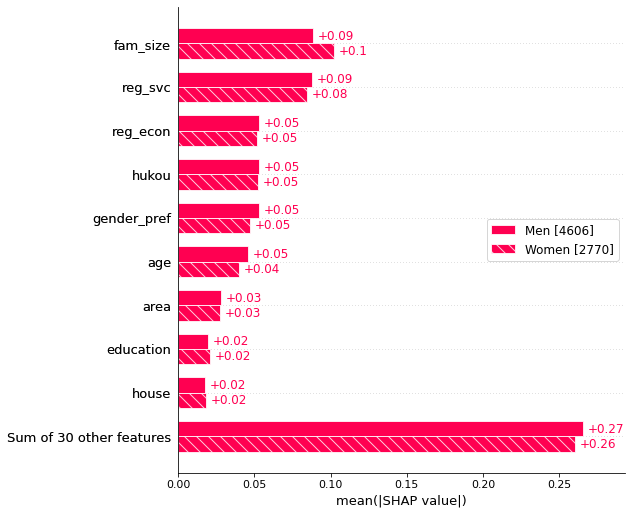

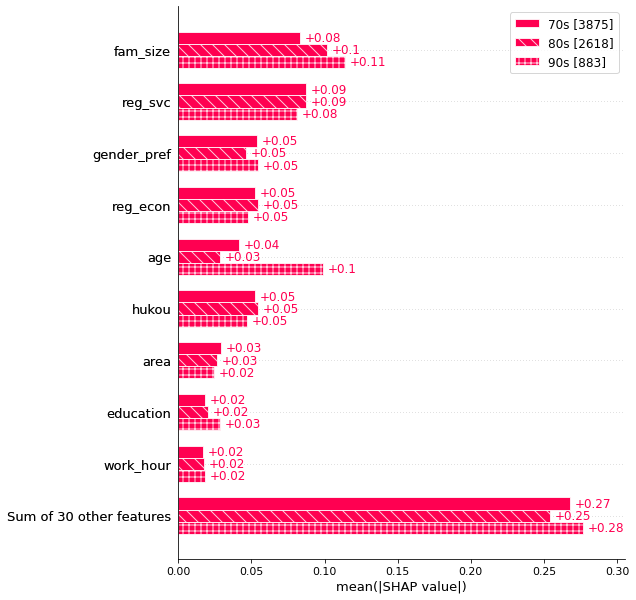

In [4]:
#队列条形图
sex = ["Women" if shap_values2[i,"gender"].data == 0 
       else "Men" for i in range(shap_values2.shape[0])]
shap.plots.bar(shap_values2.cohorts(sex).abs.mean(0))
# 假设 shap_values2 是 Explanation 对象，且 "age" 是特征列
year = ["90s" if shap_values2[i,"age"].data <= 32 
        else "70s" if shap_values2[i,"age"].data >= 43
       else "80s" for i in range(shap_values2.shape[0])]
shap.plots.bar(shap_values2.cohorts(year).abs.mean(0))

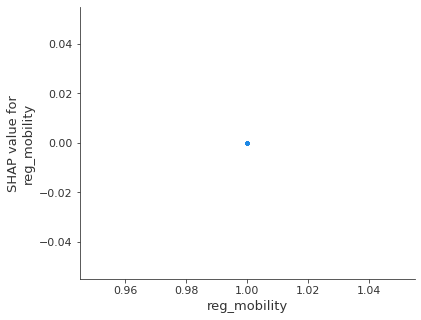

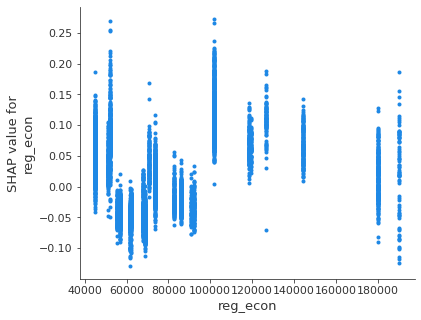

ValueError: Could not find feature named: fam_income

In [5]:
#依赖图
shap.dependence_plot('reg_mobility', shap_values, data_x, interaction_index=None)
shap.dependence_plot('reg_econ', shap_values, data_x, interaction_index=None)
shap.dependence_plot('work_hour', shap_values, data_x, interaction_index='fam_income')
shap.dependence_plot('reg_eduratio', shap_values, data_x, interaction_index=None)
shap.dependence_plot('education', shap_values, data_x, interaction_index=None)
shap.dependence_plot('reg_medicare', shap_values, data_x, interaction_index=None)
shap.dependence_plot('reg_childcare', shap_values, data_x, interaction_index=None)
shap.dependence_plot('internet', shap_values, data_x, interaction_index=None)
shap.dependence_plot('insurance', shap_values, data_x, interaction_index=None)

In [ ]:
#交互图
shap_interaction_values = explainer.shap_interaction_values(data_x)
shap.summary_plot(shap_interaction_values, data_x)
print(result)

In [ ]:
#ale图
plt.rc("figure", figsize=(9,6))
ale_plot(result['model'], data_x, 'age', monte_carlo=True)
ale_plot(result['model'], data_x, 'reg_mobility', monte_carlo=True)
ale_plot(model=result['model'], train_set=data_x, features=["age","reg_mobility"], bins=10, monte_carlo=True)

In [ ]:
#一维线性
ale_plot(model=result['model'], train_set=data_x, features=["fam_size"], bins=10, monte_carlo=True)
ale_plot(model=result['model'], train_set=data_x, features=["reg_svc"], bins=10, monte_carlo=True)
ale_plot(model=result['model'], train_set=data_x, features=["age"], bins=10, monte_carlo=True)
ale_plot(model=result['model'], train_set=data_x, features=["reg_urgap"], bins=10, monte_carlo=True)
ale_plot(model=result['model'], train_set=data_x, features=["reg_mobility"], bins=10, monte_carlo=True)
ale_plot(model=result['model'], train_set=data_x, features=["reg_econ"], bins=10, monte_carlo=True)
ale_plot(model=result['model'], train_set=data_x, features=["reg_eduratio"], bins=10, monte_carlo=True)
ale_plot(model=result['model'], train_set=data_x, features=["fam_income"], bins=10, monte_carlo=True)
ale_plot(model=result['model'], train_set=data_x, features=["education"], bins=10, monte_carlo=True)
ale_plot(model=result['model'], train_set=data_x, features=["work_hour"], bins=10, monte_carlo=True)
ale_plot(model=result['model'], train_set=data_x, features=["internet"], bins=10, monte_carlo=True)
ale_plot(model=result['model'], train_set=data_x, features=["social_trust"], bins=10, monte_carlo=True)
ale_plot(model=result['model'], train_set=data_x, features=["insurance"], bins=10, monte_carlo=True)

In [ ]:
#交叉图
plt.rc("figure", figsize=(16,9))
ale_plot(model=result['model'], train_set=data_x, features=["age","education"], bins=10, monte_carlo=True)
ale_plot(model=result['model'], train_set=data_x, features=["fam_income_rel","work_hour"], bins=10, monte_carlo=True)
ale_plot(model=result['model'], train_set=data_x, features=["reg_mobility","fam_income"], bins=10, monte_carlo=True)

In [ ]:
#ale图
## 1D - continuous - no CI
ale_eff = ale(
    X=data_x,model=result['model'], feature=["reg_mobility"], grid_size=50, include_CI=False
)
plt.savefig('reg_mobility.png',dpi=600)
ale_eff = ale(
    X=data_x,model=result['model'], feature=["fam_size"], grid_size=50, include_CI=False
)
plt.savefig('fam_size.png',dpi=600)
ale_eff = ale(
    X=data_x,model=result['model'], feature=["reg_svc"], grid_size=50, include_CI=False
)
plt.savefig('reg_svc',dpi=600)
ale_eff = ale(
    X=data_x,model=result['model'], feature=["age"], grid_size=50, include_CI=False
)
plt.savefig('age.png',dpi=600)
ale_eff = ale(
    X=data_x,model=result['model'], feature=["reg_urgap"], grid_size=50, include_CI=False
)
plt.savefig('reg_urgap.png',dpi=600)
ale_eff = ale(
    X=data_x,model=result['model'], feature=["reg_econ"], grid_size=50, include_CI=False
)
plt.savefig('reg_econ.png',dpi=600)

In [ ]:
## 1D - continuous - with 95% CI
random.seed(123)
X_sample = data_x.loc[random.sample(data_x.index.to_list(), 1000), :]
ale_eff = ale(
    X=X_sample, model=result['model'], feature=["reg_mobility"], grid_size=50, include_CI=True, C=0.95
)
ale_eff = ale(
    X=X_sample, model=result['model'], feature=["reg_eduratio"], grid_size=50, include_CI=True, C=0.95
)
ale_eff = ale(
    X=X_sample, model=result['model'], feature=["social_trust"], grid_size=50, include_CI=True, C=0.95
)
ale_eff = ale(
    X=X_sample, model=result['model'], feature=["work_hour"], grid_size=50, include_CI=True, C=0.95
)
ale_eff = ale(
    X=X_sample, model=result['model'], feature=["internet"], grid_size=50, include_CI=True, C=0.95
)

In [ ]:
#ale图
#离散ale1D
## 1D - discrete
ale_eff = ale(X=data_x, model=result['model'], feature=["education"])
ale_eff = ale(X=data_x, model=result["model"], feature=["insurance"])

In [ ]:
#2Dale图
ale_eff = ale(X=data_x,model=result['model'], feature=["age","education"], grid_size=100)
ale_eff = ale(X=data_x,model=result['model'], feature=["work_hour","fam_income_rel"], grid_size=100)